In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [31]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [32]:
df.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [33]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values

    return summ

summary(df).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg
User ID,int64,0,0,10000,1.000000,10000.000000,5000.500000
Age,int64,0,0,42,18.000000,59.000000,38.390100
Gender,object,0,0,3,nan,nan,nan
Height (cm),int64,0,0,50,150.000000,199.000000,174.275100
Weight (kg),int64,0,0,70,50.000000,119.000000,84.903000
Workout Type,object,0,0,6,nan,nan,nan
Workout Duration (mins),int64,0,0,110,10.000000,119.000000,64.464800
Calories Burned,int64,0,0,900,100.000000,999.000000,552.100800
Heart Rate (bpm),int64,0,0,100,80.000000,179.000000,129.526700
Steps Taken,int64,0,0,7767,1000.000000,19998.000000,10455.496600


In [8]:
#import plotly.express as px

cat_columns = df[['Gender', 'Workout_Type', 'Workout_Frequency (days/week)', 'Experience_Level']]

def univariateAnalysis_category(df, col):
    print(f"Distribution of {col}")
    print("_" * 120)

    value_counts = df[col].value_counts()
    colors = [
        '#FFD700', '#FF6347', '#40E0D0', '#FF69B4', '#7FFFD4',  
        '#FFA500', '#00FA9A', '#FF4500', '#4682B4', '#DA70D6',  
        '#FFB6C1', '#FF1493', '#FF8C00', '#98FB98', '#9370DB', 
        '#32CD32', '#00CED1', '#1E90FF', '#FFFF00', '#7CFC00'  
    ]

    # Bar Plot
    plt.figure(figsize=(8, 5))
    plt.bar(value_counts.index, value_counts.values, color=colors[:len(value_counts)])
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Distribution of Gender
________________________________________________________________________________________________________________________


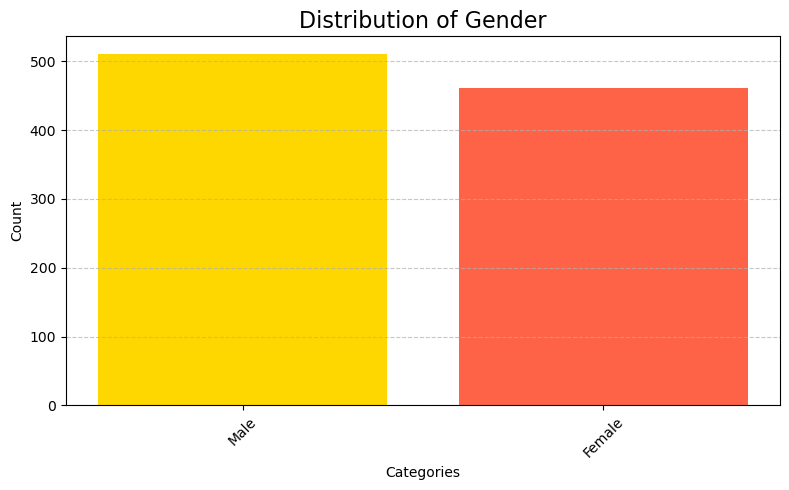

Distribution of Workout_Type
________________________________________________________________________________________________________________________


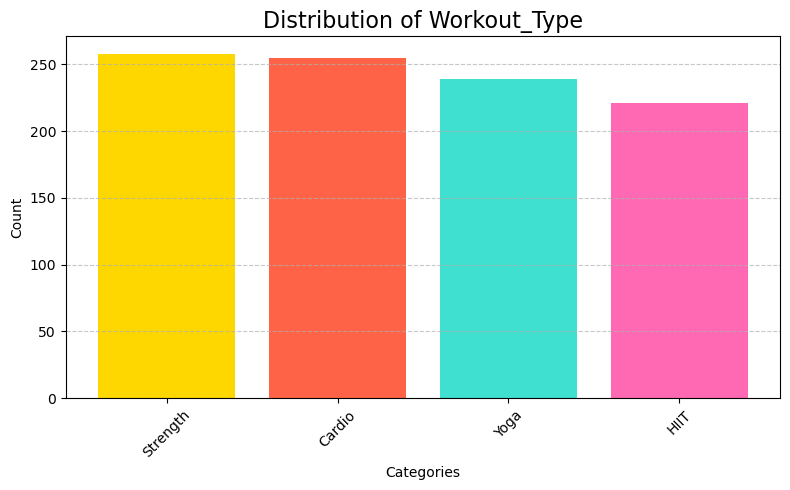

Distribution of Workout_Frequency (days/week)
________________________________________________________________________________________________________________________


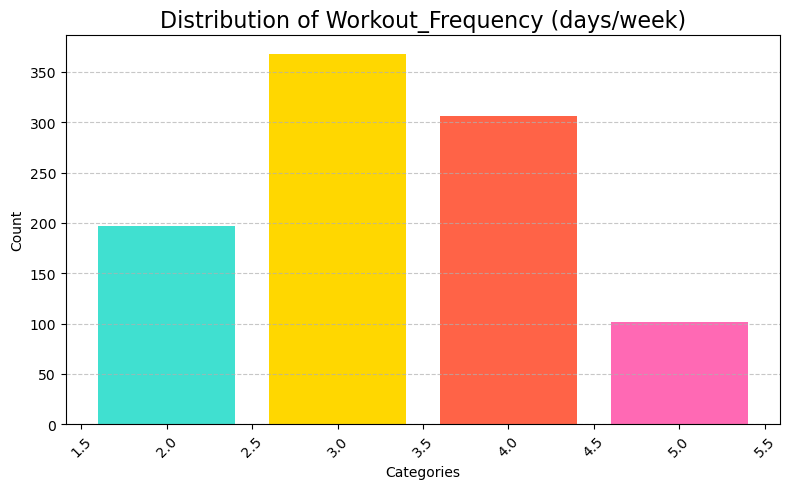

Distribution of Experience_Level
________________________________________________________________________________________________________________________


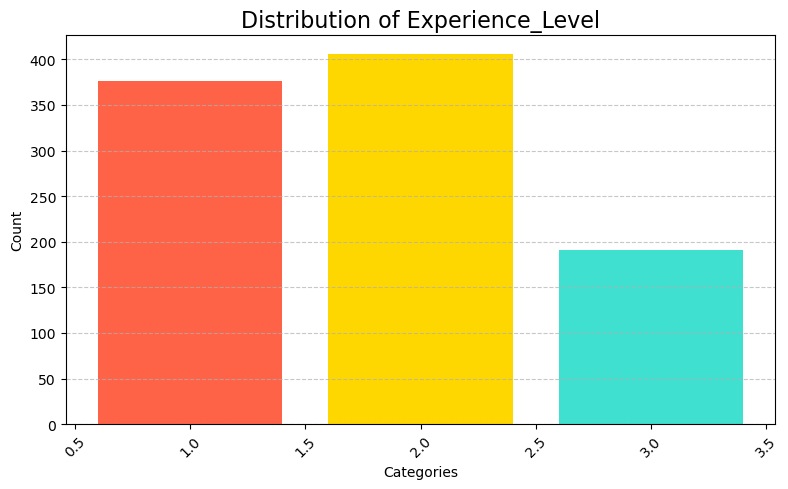

In [9]:
cat_columns = df[['Gender', 'Workout_Type', 'Workout_Frequency (days/week)', 'Experience_Level']]

for x in cat_columns:
    univariateAnalysis_category(df,x)

In [10]:
import matplotlib.pyplot as plt

colors = [
    '#FFD700',   # Gold
    '#FFB6C1',   # Light Pink
    '#32CD32'    # Lime Green
]

def create_histplot(df, x, title, nbins=50, color_index=0):
    print("\n")
    print(f"{title} Distribution".center(60, ' '))  # Console-friendly center title
    
    plt.figure(figsize=(8, 5))
    plt.hist(df[x].dropna(), bins=nbins, color=colors[color_index], edgecolor='black', alpha=0.8)
    plt.title(f'{title} Distribution', fontsize=16, color='white', pad=20)
    plt.xlabel(x, fontsize=12, color='white')
    plt.ylabel('Frequency', fontsize=12, color='white')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Dark theme setup
    ax = plt.gca()
    ax.set_facecolor('black')
    ax.tick_params(colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.title.set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    plt.tight_layout()
    plt.show()




                  Weight (kg) Distribution                  


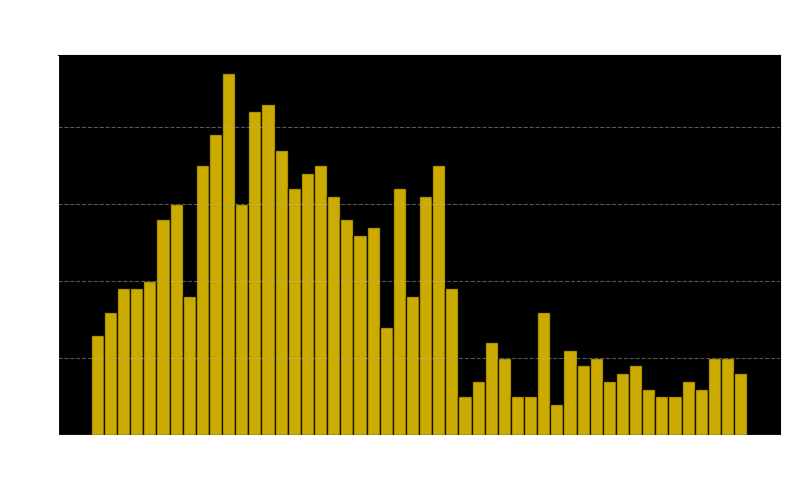



           Session_Duration (hours) Distribution            


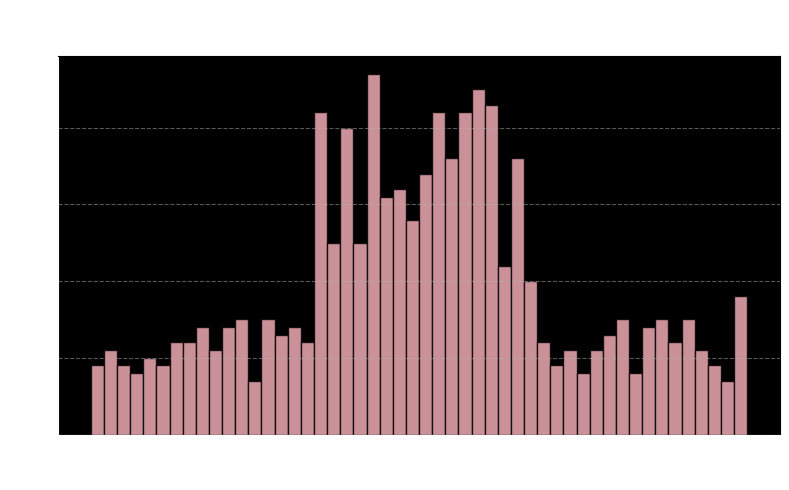



                Calories_Burned Distribution                


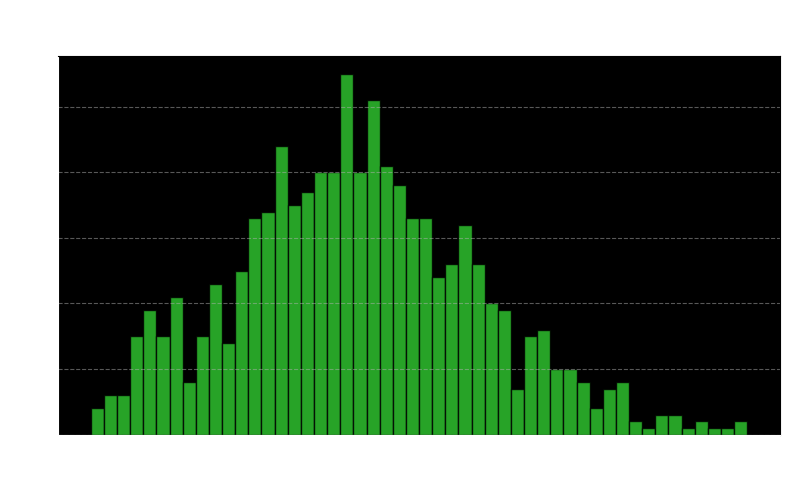

In [11]:
create_histplot(df, 'Weight (kg)', 'Weight (kg)', nbins=50, color_index=0)
create_histplot(df, 'Session_Duration (hours)', 'Session_Duration (hours)', nbins=50, color_index=1)
create_histplot(df, 'Calories_Burned', 'Calories_Burned', nbins=50, color_index=2)


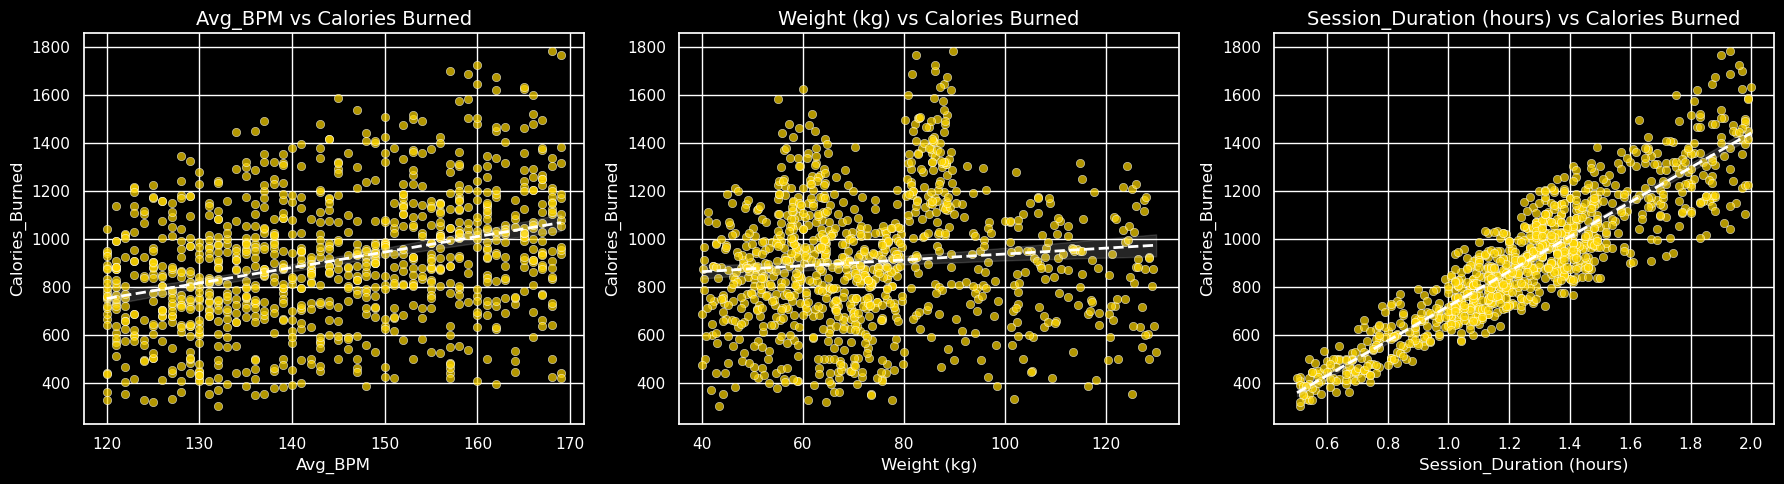

In [14]:
def analyze_calorie_relation(df):
    sns.set(style="darkgrid", palette="pastel", rc={"axes.facecolor": "#000000", "figure.facecolor": "#000000"})

    features = ['Avg_BPM', 'Weight (kg)', 'Session_Duration (hours)']
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for i, feature in enumerate(features):
        sns.scatterplot(
            data=df,
            x=feature,
            y='Calories_Burned',
            ax=axs[i],
            color='#FFD700',
            edgecolor='white',
            alpha=0.7
        )
        sns.regplot(
            data=df,
            x=feature,
            y='Calories_Burned',
            scatter=False,
            ax=axs[i],
            color='white',
            line_kws={'linewidth': 2, 'linestyle': '--'}
        )
        axs[i].set_title(f'{feature} vs Calories Burned', color='white', fontsize=14)
        axs[i].tick_params(colors='white')
        axs[i].spines['bottom'].set_color('white')
        axs[i].spines['left'].set_color('white')
        axs[i].set_facecolor('black')
        axs[i].xaxis.label.set_color('white')
        axs[i].yaxis.label.set_color('white')

    plt.tight_layout()
    plt.show()

analyze_calorie_relation(df)

/tmp/ipykernel_3607/2553472059.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = df.groupby(['BPM_bin', 'Duration_bin'])['Calories_Burned'].mean().unstack()


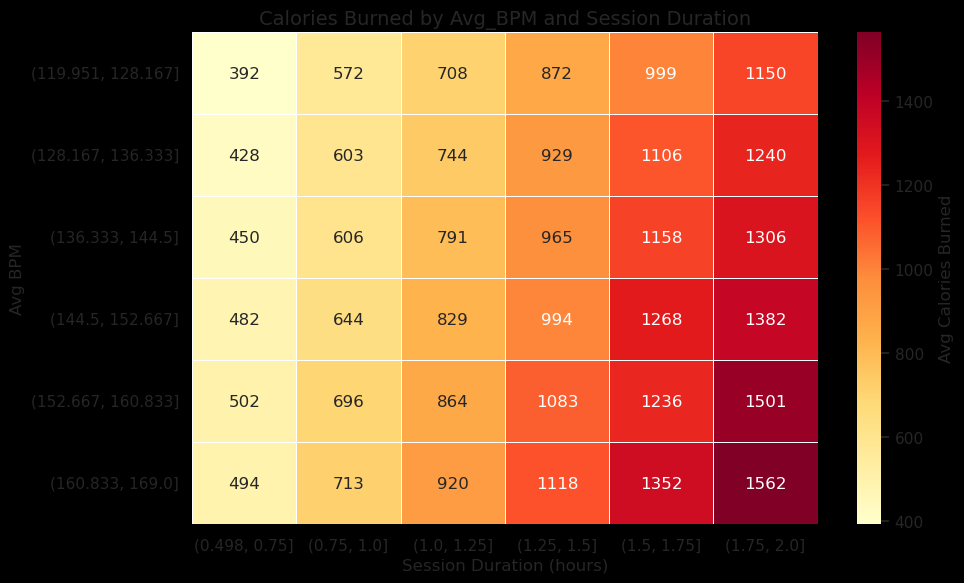

In [15]:
def heatmap_bpm_duration_vs_calories(df, bpm_bins=6, duration_bins=6):
    # Bin the continuous values into groups
    df['BPM_bin'] = pd.cut(df['Avg_BPM'], bins=bpm_bins)
    df['Duration_bin'] = pd.cut(df['Session_Duration (hours)'], bins=duration_bins)

    # Group by both binned features and get average Calories_Burned
    pivot_table = df.groupby(['BPM_bin', 'Duration_bin'])['Calories_Burned'].mean().unstack()

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Avg Calories Burned'})
    plt.title('Calories Burned by Avg_BPM and Session Duration', fontsize=14)
    plt.xlabel('Session Duration (hours)')
    plt.ylabel('Avg BPM')
    plt.tight_layout()
    plt.show()

heatmap_bpm_duration_vs_calories(df)

In [16]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,BPM_bin,Duration_bin
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,"(152.667, 160.833]","(1.5, 1.75]"
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,"(144.5, 152.667]","(1.25, 1.5]"
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,"(119.951, 128.167]","(1.0, 1.25]"
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,"(160.833, 169.0]","(0.498, 0.75]"
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,"(152.667, 160.833]","(0.498, 0.75]"


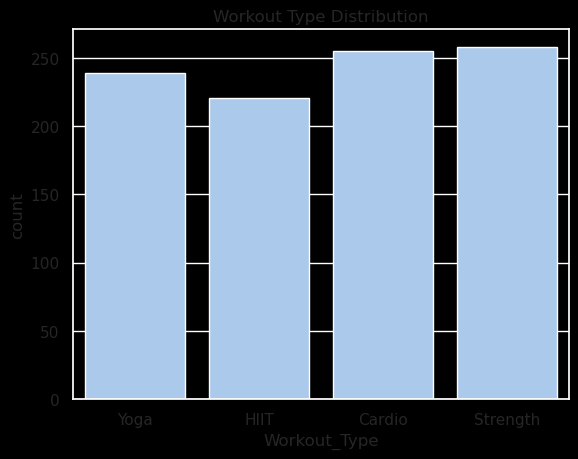

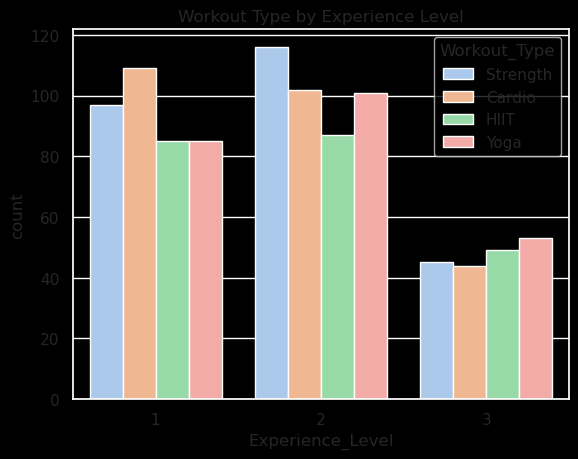

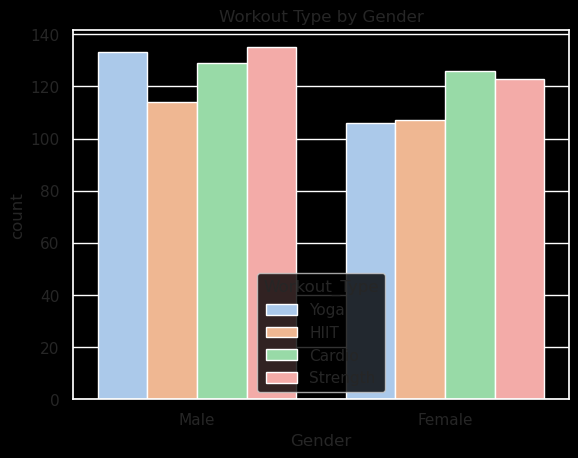

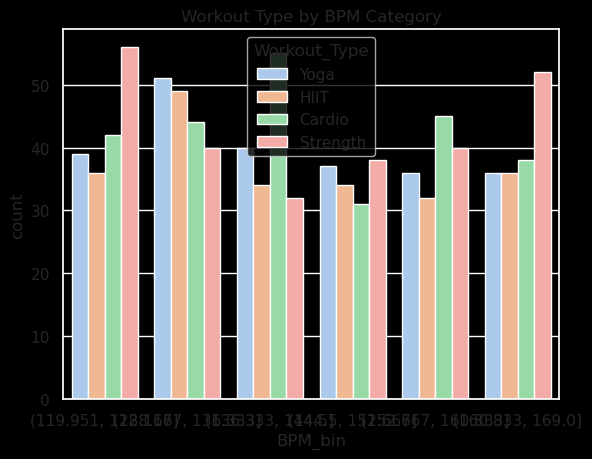

In [17]:
# Count of workout types
sns.countplot(data=df, x='Workout_Type')
plt.title('Workout Type Distribution')
plt.show()

# Workout type vs Experience Level
sns.countplot(data=df, x='Experience_Level', hue='Workout_Type')
plt.title('Workout Type by Experience Level')
plt.show()

# Workout type vs Gender
sns.countplot(data=df, x='Gender', hue='Workout_Type')
plt.title('Workout Type by Gender')
plt.show()

# Workout type vs BPM_bin
sns.countplot(data=df, x='BPM_bin', hue='Workout_Type')
plt.title('Workout Type by BPM Category')
plt.show()


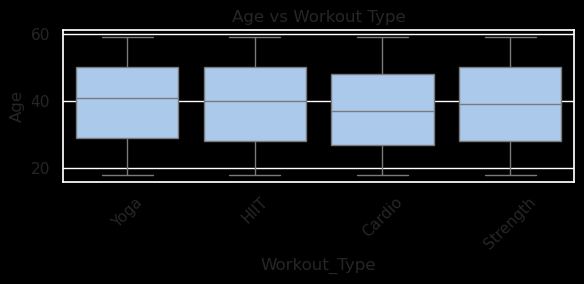

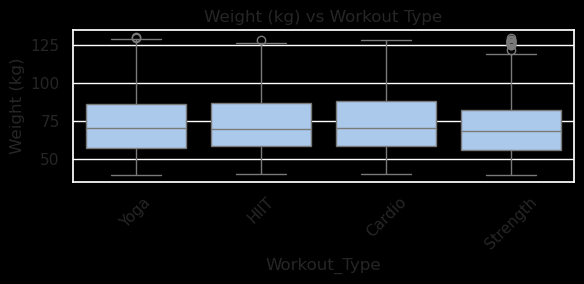

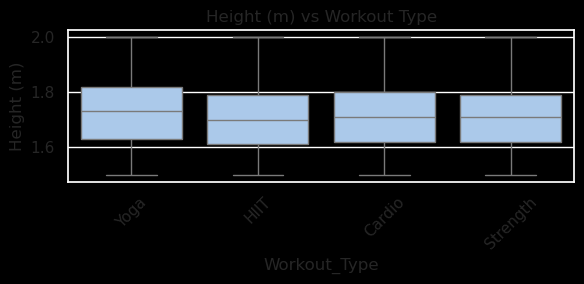

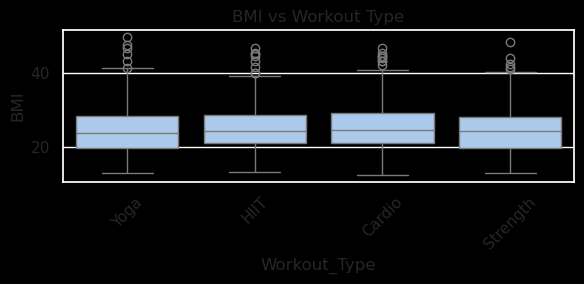

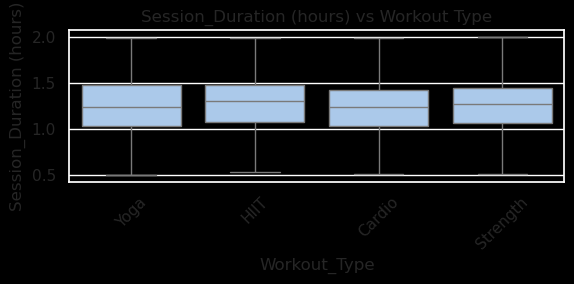

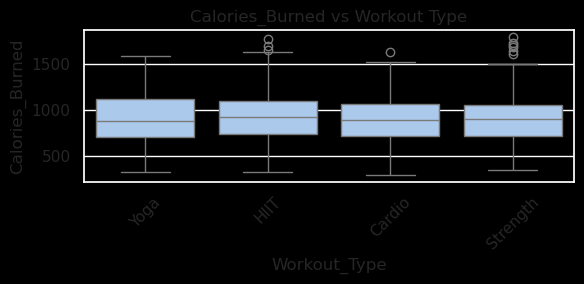

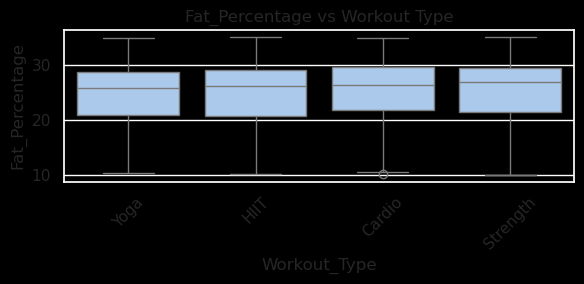

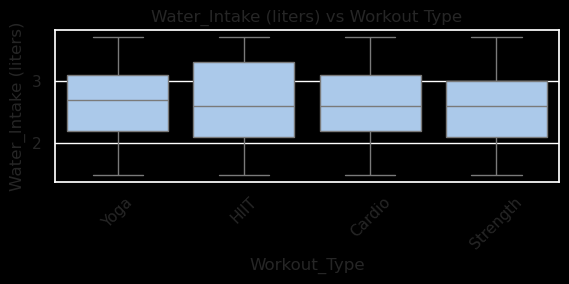

In [18]:
# Boxplots for numerical feature variation across workout types
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)']

for feature in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x='Workout_Type', y=feature)
    plt.title(f'{feature} vs Workout Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


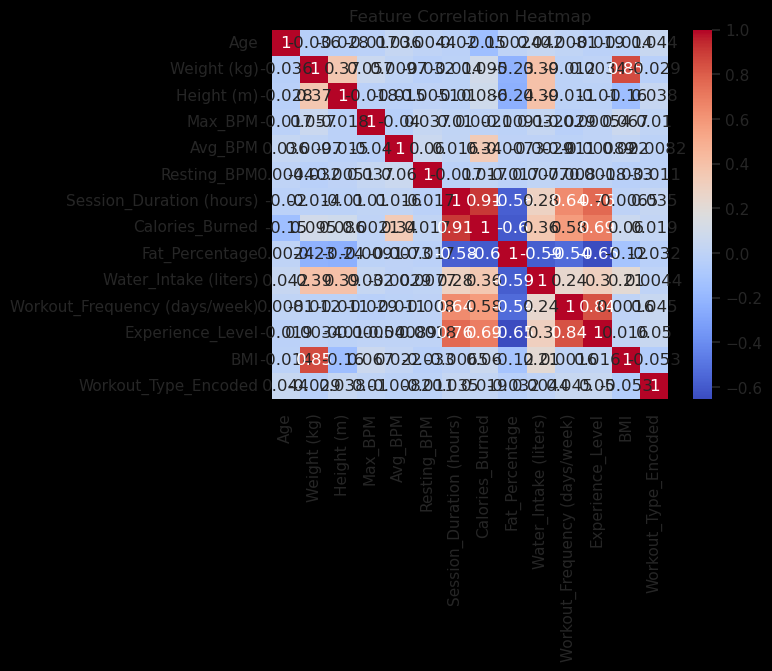

In [19]:
import numpy as np

# Encode workout_type to numeric for correlation
df_encoded = df.copy()
df_encoded['Workout_Type_Encoded'] = df_encoded['Workout_Type'].astype('category').cat.codes

# Correlation matrix
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [20]:
def infer_goal(row):
    if row['Fat_Percentage'] > 25 and row['Calories_Burned'] > 400:
        return 'Fat Loss'
    elif row['BMI'] > 24 and row['Fat_Percentage'] < 20:
        return 'Muscle Gain'
    elif row['Session_Duration (hours)'] > 1:
        return 'Endurance'
    else:
        return 'General Fitness'

df['Goal'] = df.apply(infer_goal, axis=1)


In [21]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,BPM_bin,Duration_bin,Goal
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,"(152.667, 160.833]","(1.5, 1.75]",Muscle Gain
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,"(144.5, 152.667]","(1.25, 1.5]",Fat Loss
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,"(119.951, 128.167]","(1.0, 1.25]",Fat Loss
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,"(160.833, 169.0]","(0.498, 0.75]",Fat Loss
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,"(152.667, 160.833]","(0.498, 0.75]",Fat Loss


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Encode categoricals
df_model = pd.get_dummies(df, columns=['Gender', 'Experience_Level', 'BPM_bin', 'Duration_bin', 'Goal'])

# Label encode target
df_model['Workout_Type_Label'] = df_model['Workout_Type'].astype('category').cat.codes

X = df_model.drop(columns=['Workout_Type', 'Workout_Type_Label'])
y = df_model['Workout_Type_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.17      0.16      0.16        51
           1       0.25      0.16      0.19        44
           2       0.22      0.27      0.24        52
           3       0.30      0.35      0.32        48

    accuracy                           0.24       195
   macro avg       0.24      0.23      0.23       195
weighted avg       0.23      0.24      0.23       195



In [24]:
def infer_goal(row):
    if row['Fat_Percentage'] > 25 or row['BMI'] > 25:
        return 'Fat Loss'
    elif row['Experience_Level'] in ['Intermediate', 'Advanced'] and row['Workout_Frequency (days/week)'] >= 4:
        return 'Muscle Gain'
    elif row['Session_Duration (hours)'] > 1:
        return 'Endurance'
    elif row['Age'] > 45:
        return 'Mobility / General Fitness'
    else:
        return 'General Fitness'

df['Goale'] = df.apply(infer_goal, axis=1)


In [25]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,BPM_bin,Duration_bin,Goal,Goale
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,"(152.667, 160.833]","(1.5, 1.75]",Muscle Gain,Fat Loss
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,"(144.5, 152.667]","(1.25, 1.5]",Fat Loss,Fat Loss
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,"(119.951, 128.167]","(1.0, 1.25]",Fat Loss,Fat Loss
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,"(160.833, 169.0]","(0.498, 0.75]",Fat Loss,Fat Loss
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,"(152.667, 160.833]","(0.498, 0.75]",Fat Loss,Fat Loss


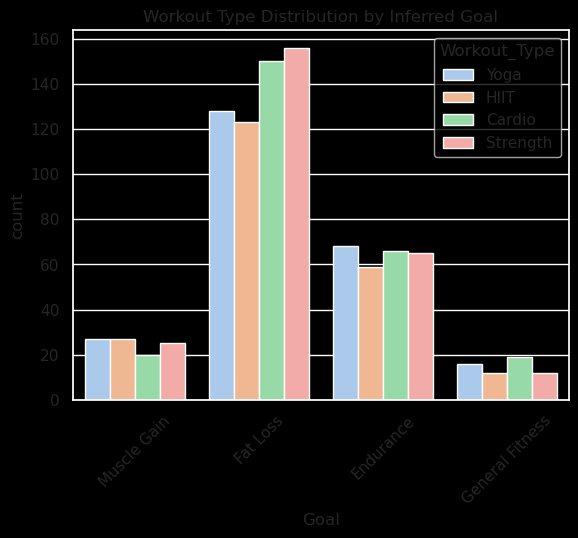

In [26]:
sns.countplot(data=df, x='Goal', hue='Workout_Type')
plt.xticks(rotation=45)
plt.title("Workout Type Distribution by Inferred Goal")
plt.show()


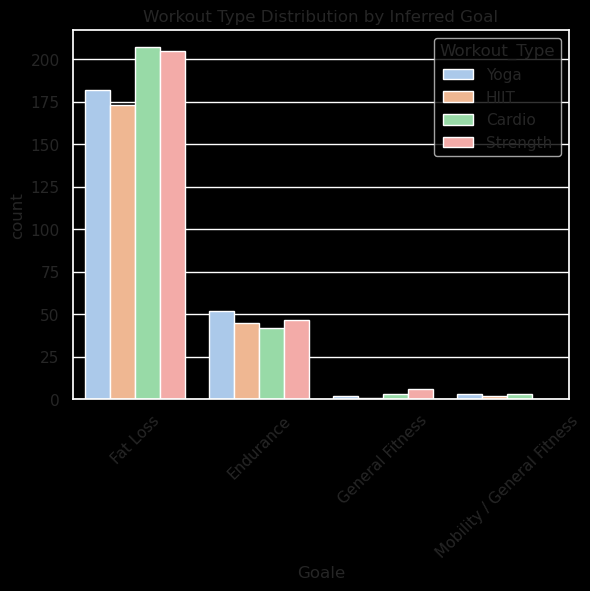

In [27]:
sns.countplot(data=df, x='Goale', hue='Workout_Type')
plt.xticks(rotation=45)
plt.title("Workout Type Distribution by Inferred Goal")
plt.show()


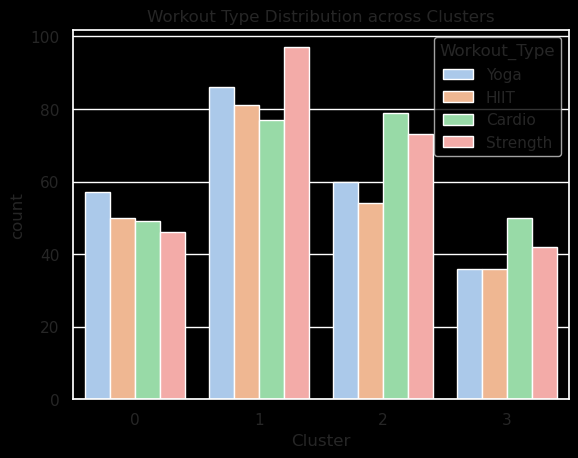

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['Age', 'BMI', 'Fat_Percentage', 'Session_Duration (hours)', 'Calories_Burned']
X_scaled = StandardScaler().fit_transform(df[features])

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Now check if clusters relate to workout type
sns.countplot(data=df, x='Cluster', hue='Workout_Type')
plt.title("Workout Type Distribution across Clusters")
plt.show()


/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


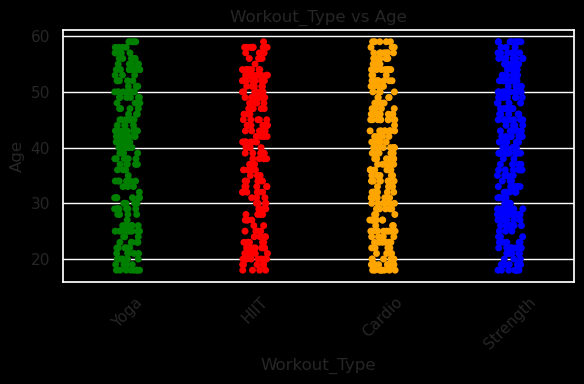

/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


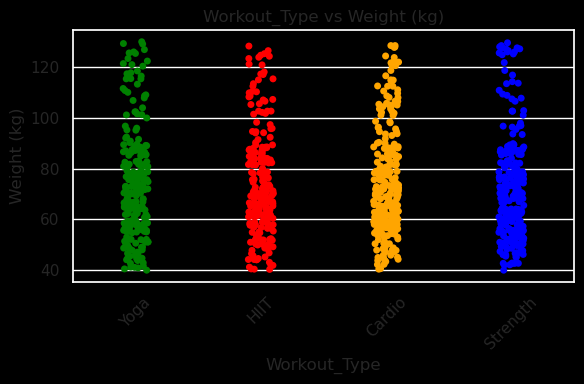

/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


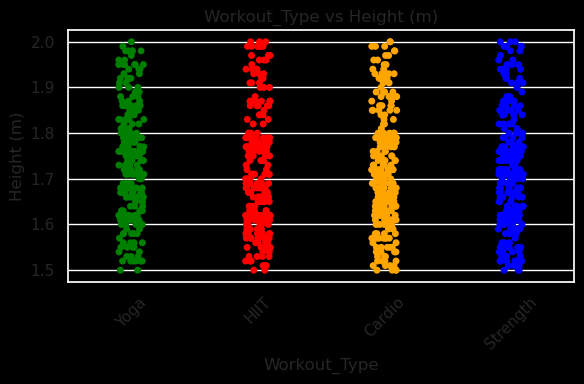

/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


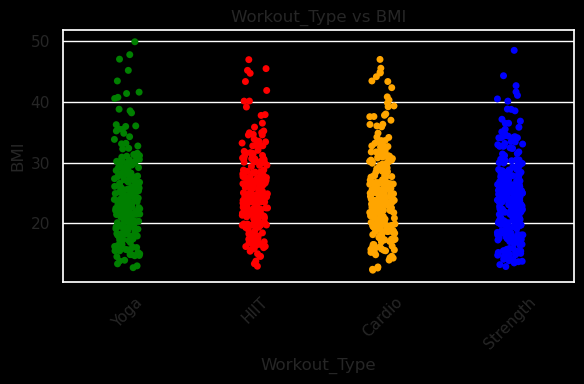

/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


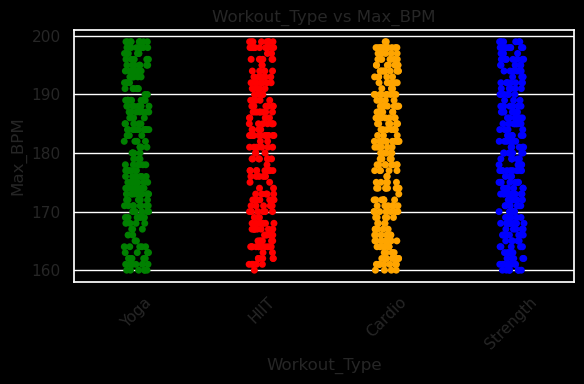

/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


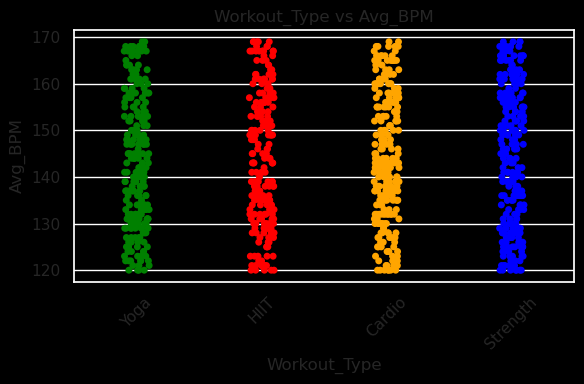

/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


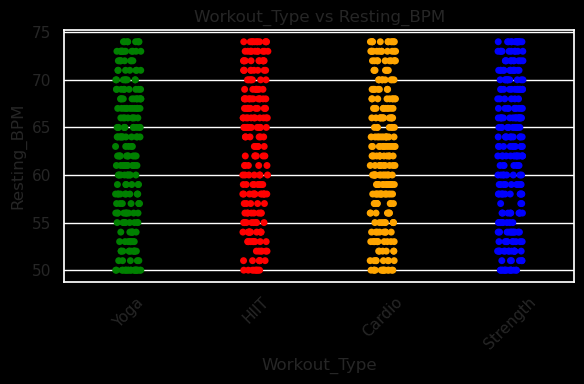

/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


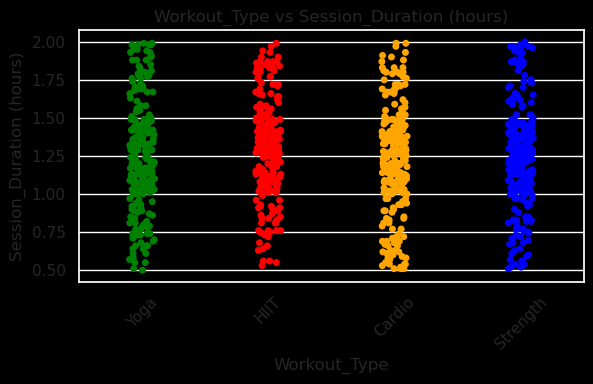

/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


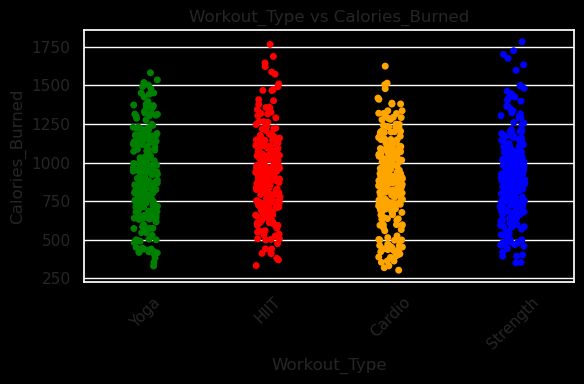

/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


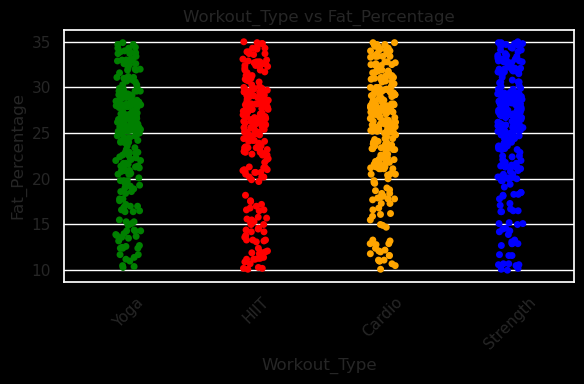

/tmp/ipykernel_3607/69211771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)


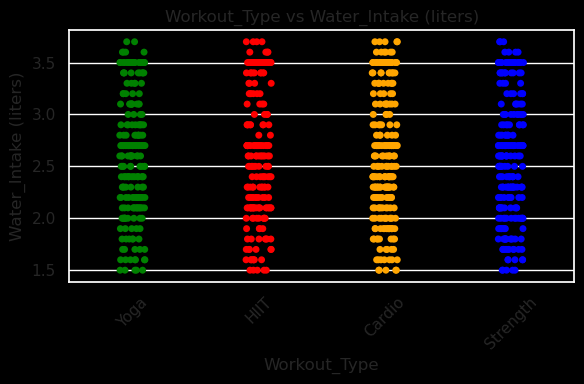

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define workout type color palette
palette = {'HIIT': 'red', 'Yoga': 'green', 'Strength': 'blue', 'Cardio': 'orange'}

# List of numerical features
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'BMI',
                      'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                      'Session_Duration (hours)', 'Calories_Burned', 
                      'Fat_Percentage', 'Water_Intake (liters)']

# Scatter plot: Workout_Type vs each numeric feature (Y-axis)
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.stripplot(data=df, x='Workout_Type', y=feature, jitter=True, palette=palette)
    plt.title(f'Workout_Type vs {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


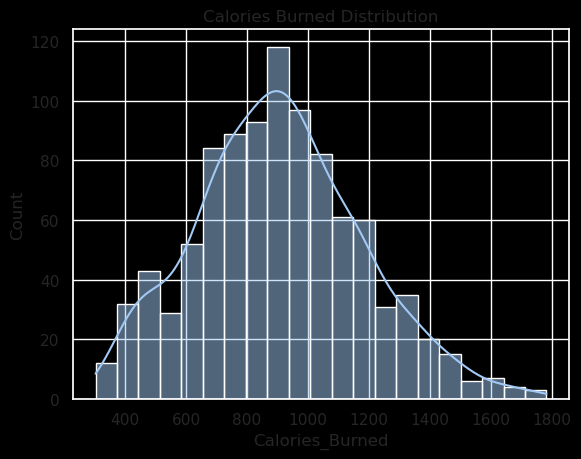

In [38]:
sns.histplot(data=df, x='Calories_Burned', kde=True)
plt.title('Calories Burned Distribution')
plt.show()

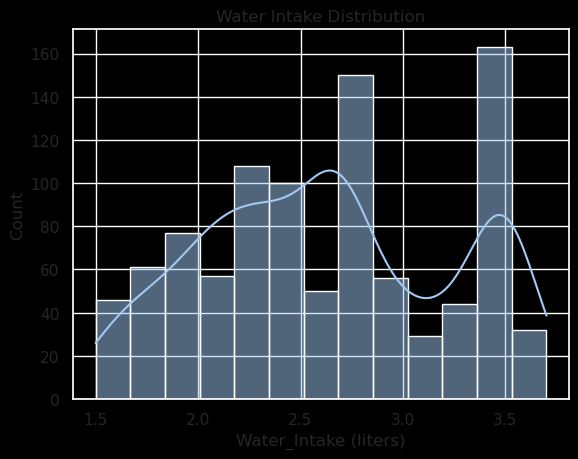

In [39]:
sns.histplot(data=df, x='Water_Intake (liters)', kde=True)
plt.title('Water Intake Distribution')
plt.show()


/tmp/ipykernel_3607/2884568609.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', palette='Set2')


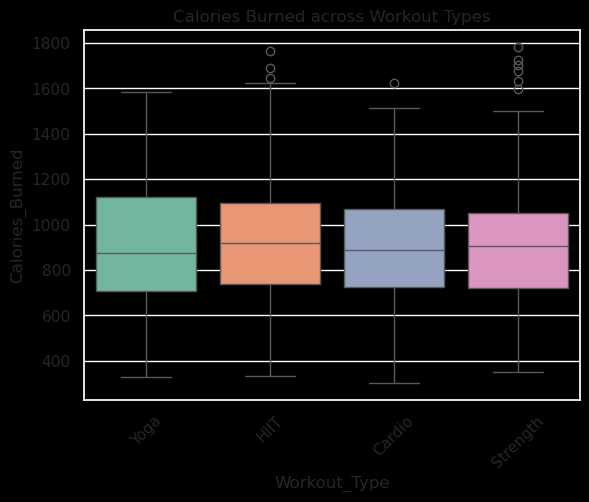

In [40]:
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', palette='Set2')
plt.title('Calories Burned across Workout Types')
plt.xticks(rotation=45)
plt.show()


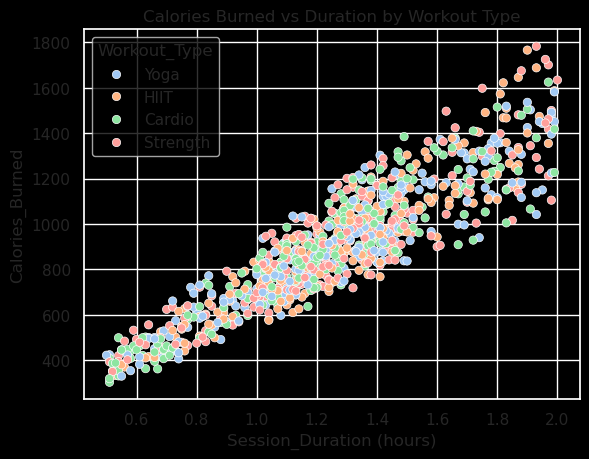

In [41]:
sns.scatterplot(data=df, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type')
plt.title('Calories Burned vs Duration by Workout Type')
plt.show()


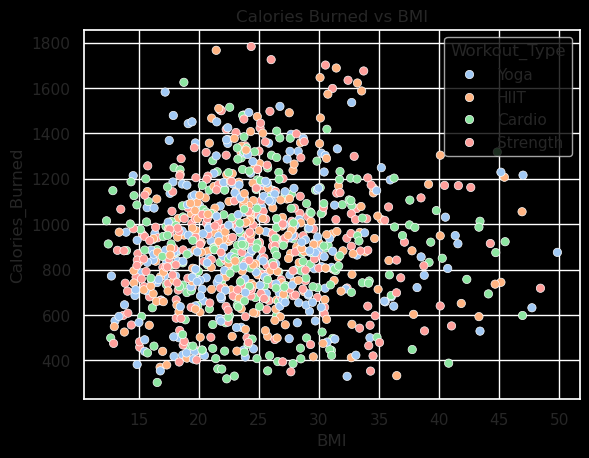

In [42]:
sns.scatterplot(data=df, x='BMI', y='Calories_Burned', hue='Workout_Type')
plt.title('Calories Burned vs BMI')
plt.show()


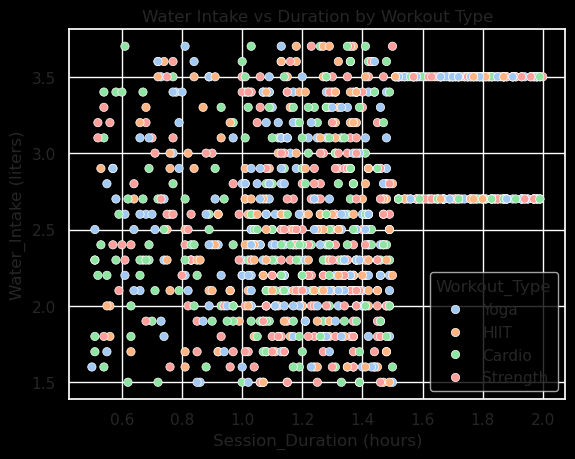

In [43]:
sns.scatterplot(data=df, x='Session_Duration (hours)', y='Water_Intake (liters)', hue='Workout_Type')
plt.title('Water Intake vs Duration by Workout Type')
plt.show()


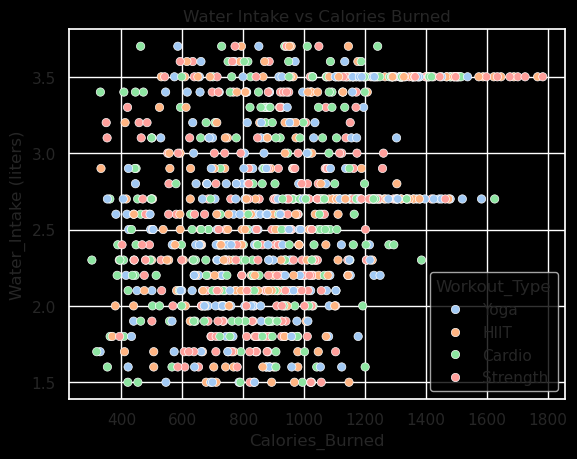

In [44]:
sns.scatterplot(data=df, x='Calories_Burned', y='Water_Intake (liters)', hue='Workout_Type')
plt.title('Water Intake vs Calories Burned')
plt.show()


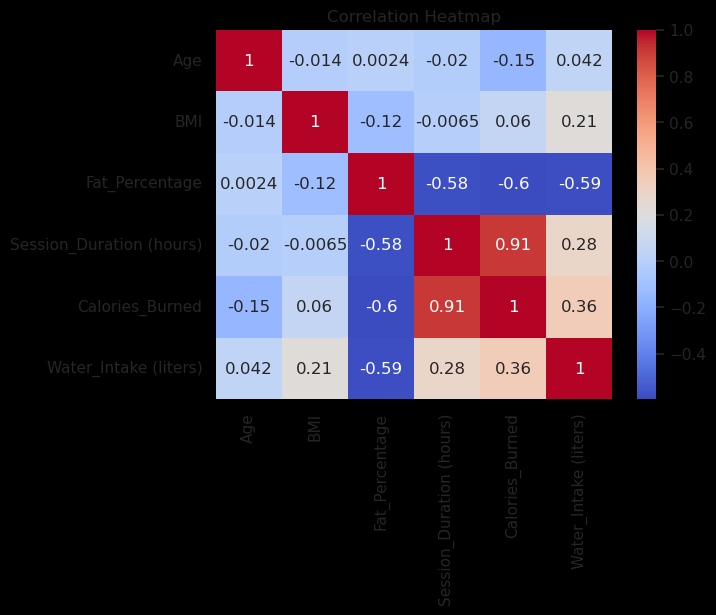

In [45]:
corr_cols = ['Age', 'BMI', 'Fat_Percentage', 'Session_Duration (hours)', 'Calories_Burned', 'Water_Intake (liters)']
corr = df[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
